# Laboratorul 9

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
from sklearn.preprocessing import normalize
from dictlearn import methods, DictionaryLearning

In [ ]:
p = 8           # dimensiunea unui patch (numar de pixeli)
s = 6           # sparsitatea
N = 1000        # numarul total de patch-uri
n = 256         # numarul de atomi din dictionar
K = 50          # numarul de iteratii DL
sigma = 0.075   # deviatia standard a zgomotului

float32


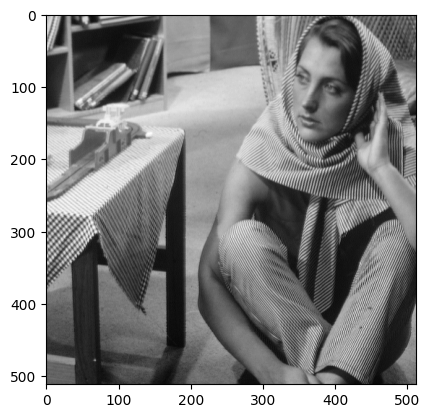

In [ ]:
I = image.imread('barbara.png')
print(I.dtype)

plt.imshow(I, cmap='gray')
plt.show()

[]

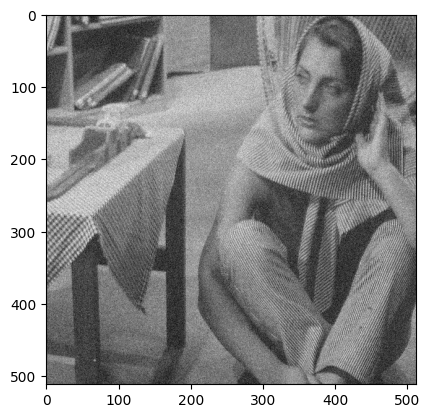

In [ ]:
Inoisy = I + sigma*np.random.randn(I.shape[0], I.shape[1])

plt.imshow(Inoisy, cmap='gray')
plt.plot()

In [ ]:
Ynoisy = extract_patches_2d(Inoisy, (p, p))
Ynoisy.shape

(255025, 8, 8)

In [ ]:
Ynoisy = Ynoisy.reshape(Ynoisy.shape[0], -1)
Ynoisy.shape

(255025, 64)

In [ ]:
Ynoisy = np.transpose(Ynoisy)

In [ ]:
Ynoisy_mean = Ynoisy.mean(axis=0)
Ynoisy_mean

array([0.76833642, 0.77709434, 0.76835512, ..., 0.40199397, 0.41081709,
       0.4204977 ])

In [ ]:
Ynoisy -= Ynoisy_mean

In [ ]:
indices = np.random.choice(Ynoisy.shape[1], N)
Y = Ynoisy[:, indices]
Y.shape

(64, 1000)

In [ ]:
D0 = np.random.randn(p * p, n)
D0 = normalize(D0, axis=0, norm='max')

In [ ]:
dl = DictionaryLearning(
    n_components=n,
    max_iter=K,
    fit_algorithm='ksvd',
    n_nonzero_coefs=s,
    code_init=None,
    dict_init=D0,
    params=None,
    data_sklearn_compat=False
)
dl.fit(Y)
D = dl.D_

In [ ]:
X, err = methods.omp(Ynoisy, D, n_nonzero_coefs=s)

In [ ]:
Yc = D @ X

In [ ]:
Yc += Ynoisy_mean

In [ ]:
Yc = np.transpose(Yc)
Yc = Yc.reshape(Yc.shape[0], p, p)

In [ ]:
Yc.shape

(255025, 8, 8)

In [ ]:
Ic = reconstruct_from_patches_2d(Yc, I.shape)

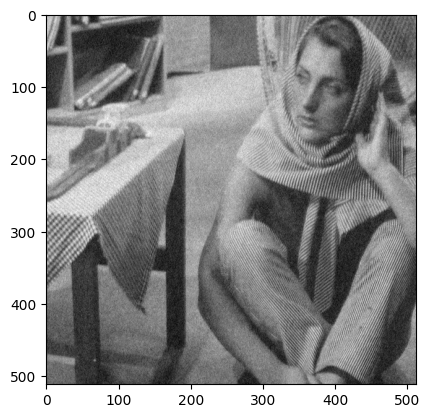

In [ ]:
plt.imshow(Ic, cmap='gray')
plt.show()

In [ ]:
def psnr(img1, img2):
        mse = np.mean((img1 - img2) ** 2)
        if(mse == 0):
            return 0
        max_pixel = 255
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
        return psnr

In [ ]:
psnr(Ic, I)

75.12607825455382

In [ ]:
psnr(Inoisy, I)

70.63268307948545